# Visualization notebook

The following notebook visualizes data on restaurants in Los Angeles.

The goals of this specific project includes examining data on restraunts in Los angeles. 

Contents:

- <a href='#the_destination0'>Step 0: Install and import libraries</a>
- <a href='#the_destination1'>Step 1: Loading data and preliminary quality checks</a>
- <a href='#the_destination2'>Step 2: Data Analysis </a>
- <a href='#the_destination2.1'>Step 2.1: General comments</a>
- <a href='#the_destination2.2'>Step 2.2: Types of Establishments </a>
- <a href='#the_destination2.3'>Step 2.3: Chains vesus independants </a>
- <a href='#the_destination2.4'>Step 2.4: Chains by name </a>
- <a href='#the_destination2.5'>Step 2.5: Data Analysis for Geography </a>
- <a href='#the_destination3'>Step 3: Presentations</a>

<a id='the_destination0'></a>
## Step 0. Install and import libraries 

I did not have every library installed in a place Jupyter could run them from. When I tried to run my code I realized I did not have plotly  so I will install them here:

In [292]:
!! pip install plotly

['Requirement already satisfied: plotly in c:\\programdata\\anaconda3\\lib\\site-packages (4.11.0)',
 'Requirement already satisfied: retrying>=1.3.3 in c:\\programdata\\anaconda3\\lib\\site-packages (from plotly) (1.3.3)',
 'Requirement already satisfied: six in c:\\programdata\\anaconda3\\lib\\site-packages (from plotly) (1.12.0)']

Next I load my basic data and libraries/packages that I like:

In [293]:
# step to load up the right libraries
#fundamental data analytics libraries and packages

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rc

In [294]:
# NLP libraries and packages

import re
import nltk

In [295]:
#fancy visualization and other fancy libraries and packages

import datetime as dt
from IPython.display import Markdown, display
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objects as go 
import plotly.graph_objs as go
import seaborn as sns


<a id='the_destination1'></a>
## Step 1. Loading data and preliminary quality checks

Loading the data:

In [296]:
data= pd.read_csv('rest_data_us.csv')

Let' do the basic of understanding the data. First let's look at some rows so we see it:

In [297]:
def printmd(string):
    display(Markdown(string))
    
printmd('**Restaurant data (original csv file)**')
data.head(15).style.set_properties(**{'background-color': 'pink',                                                   
                                    'color': 'blue',                       
                                    'border-color': 'white'})

**Restaurant data (original csv file)**

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


OK, so how long is this dataframe in rows? And what is in it in terms of data types? We will print it

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [299]:
print("This dataframe is", len(data), "rows long")

This dataframe is 9651 rows long


Maybe some of them are duplicate rows? 

In [300]:
# check for duplicates

print("Number of duplicated rows in the original data is",  data.chain[data.duplicated()].sum(), ".")

Number of duplicated rows in the original data is 0 .


Count up nulls

In [301]:
#count up nulls
print("Null values in original data:",data.isnull().sum())

Null values in original data: id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


So we have a few null values in chain. 3 is hardly anything to get upset about i a group of 9651.

<a id='the_destination2'></a>
## Step 2: Data analysis



<a id='the_destination2.1'></a>
### Step 2.1: General comments and graph index

This is a rather long notebook with many blocks of code. The people interested in all the details of notebook would be analysts. For investors and others interest in the general picture, a presentation is linked from <a href='#the_destination3'>Step 3. </a>

<a id='the_destination2.2'></a>
### Step 2.2: Type of eatery analysis

We can see how many of our places are cafes versus restraunts verus fast food versus bakery and so on:

In [302]:
data.object_type.unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

So a place is classified as  a 'Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', or 'Pizza'.

Now we can plot these different types of establishment:

In [303]:
cafes_num     = data.object_type[data.object_type == 'Cafe'].count()

restraunts_num= data.object_type[data.object_type == 'Restaurant'].count()

fast_food_num = data.object_type[data.object_type == 'Fast Food'].count()

bakery_num    = data.object_type[data.object_type == 'Bakery'].count()

bar_num        =data.object_type[data.object_type == 'Bar'].count()

pizza_num      = data.object_type[data.object_type == 'Pizza'].count()

total_rest_num = 9651

cafes = cafes_num/total_rest_num
restraunts = restraunts_num/total_rest_num
fast_food = fast_food_num/total_rest_num
bakery = bakery_num/total_rest_num
bar = bar_num/total_rest_num
pizza = pizza_num/total_rest_num

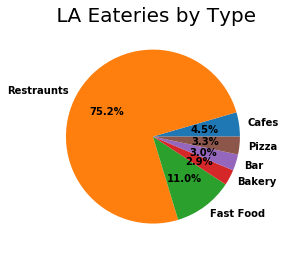

In [304]:


fig, test = plt.subplots()
test.set_title(' LA Eateries by Type', fontsize =20)

x1 =  [cafes, restraunts,fast_food,bakery,bar,pizza]
columns1 = ['Cafes', 'Restraunts', 'Fast Food', 'Bakery', 'Bar', 'Pizza'] 
plt.pie(x1, labels = columns1, autopct='%1.1f%%' )#
#plt.title('Eateries by type')

plt.show()

We can also make the pie interactive:

In [321]:

x2 =  [cafes, restraunts,fast_food,bakery,bar,pizza]
columns1 = ['Cafes', 'Restraunt', 'Fast Food', 'Bakery', 'Bar', 'Pizza'] 


fig1 = go.Figure(data=[go.Pie(labels=columns1, values=x2)])

fig1.update_layout(
    title=" LA Eateries by Type",
    xaxis_title="X Axis Title",
    yaxis_title="X Axis Title",
    legend_title="Type of place",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig1.show() 

In [316]:

x2 =  [cafes, restraunts,fast_food,bakery,bar,pizza]
columns1 = ['Cafes', 'Restraunt', 'Fast Food', 'Bakery', 'Bar', 'Pizza'] 


fig1 = go.Figure(data=[go.Pie(labels=columns1, values=x2)])

fig1.update_layout(
    title=" LA Eateries by Type",
    xaxis_title="X Axis Title",
    yaxis_title="X Axis Title",
    legend_title="Type of place",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig1.show() 


<a id='the_destination2.3'></a>
### Step 2.3: Chains vs. Unique eateries

We can see how many of our places are in a chain by percent:

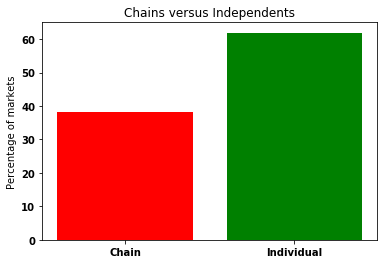

<Figure size 432x288 with 0 Axes>

In [317]:

chain_rest_num     = data.chain[data.chain == True].sum()
non_chain_rest_num = 9648-chain_rest_num # 9648 is total where we have data

total_rest_num = 9648

chain = chain_rest_num/total_rest_num
non_chain = non_chain_rest_num/total_rest_num


fig, test = plt.subplots()
test.set_title('Chains versus Independents')
test.set_ylabel('Percentage of markets')

x =  [100*chain, 100*non_chain]
columns = ['Chain', 'Individual'] 
plt.bar( columns,x, color='rg')#



#test.plot(x, y, label = 'Label 1')
#test.plot(x, y2, label = 'Label 2')
#test.plot(x, y3, label = 'Label 3')
#test.legend() # Changing graph dimensions
plt.show()
plt.savefig('chainsversusindies.png')

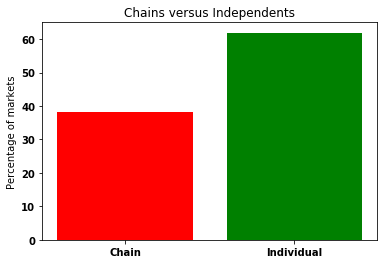

In [318]:

chain_rest_num     = data.chain[data.chain == True].sum()
non_chain_rest_num = 9648-chain_rest_num # 9648 is total where we have data

total_rest_num = 9648

chain = chain_rest_num/total_rest_num
non_chain = non_chain_rest_num/total_rest_num


fig, test = plt.subplots()
test.set_title('Chains versus Independents')
test.set_ylabel('Percentage of markets')
fig = go.Figure(data=[go.Pie(labels=columns1, values=x1)])
x =  [100*chain, 100*non_chain]
columns = ['Chain', 'Individual'] 
plt.bar( columns,x, color='rg')#



#test.plot(x, y, label = 'Label 1')
#test.plot(x, y2, label = 'Label 2')
#test.plot(x, y3, label = 'Label 3')
#test.legend() # Changing graph dimensions
plt.show()


This distribution can be visualized differently as a pie chart.

In [320]:

#fig, test = plt.subplots()

fig = go.Figure(data=[go.Pie(labels=columns, values=x)])

fig.update_layout(
    title=" Eatery Type: Chain vs. Independant",
  
    legend_title="Type of place",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))
fig.show() 

Which type of establishment is typically a chain? We can think about this in terms of what percentage of each type of restraunt is a chain.

In [16]:


totals = data.groupby('object_type').count()

chain_ones = data.groupby('object_type')['chain'].sum()

chain_percent= pd.DataFrame(totals)

chain_percent = chain_percent.drop(['id','address','object_name','chain'], axis =1)
chain_percent['chain_ones']=  chain_ones 

chain_percent['percentage'] = (chain_percent['chain_ones']/chain_percent['number'])*100
chain_percent['non_chain_ones']=  chain_percent['number'] - chain_percent['chain_ones']

print(chain_percent)


             number  chain_ones  percentage  non_chain_ones
object_type                                                
Bakery          283         283  100.000000               0
Bar             292          77   26.369863             215
Cafe            435         266   61.149425             169
Fast Food      1066         605   56.754221             461
Pizza           320         153   47.812500             167
Restaurant     7255        2292   31.592006            4963


It's clear all bakeries are chains, and the majority of cafes percentagewise. By raw number restraunts have the most chains. We can make a stacked bar graph to make the reality clearer.

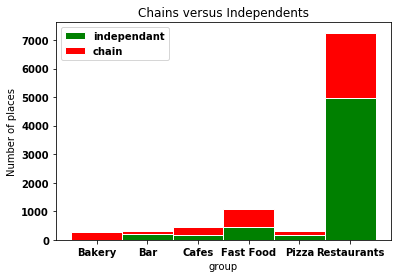

In [322]:
fig, test = plt.subplots()
test.set_title('Chains versus Independents')
test.set_ylabel('Number of places')    

rc('font', weight='bold') # y-axis in bold
 
# Values of each group
bars1 = chain_percent.non_chain_ones.tolist()
bars2 = chain_percent.chain_ones.tolist()
 
bars = np.add(bars1, bars2).tolist()# Heights of bars1 + bars2
 
r = [0,1,2,3,4,5] # The position of the bars on the x-axis
 
# Names of group and bar width
names = ['Bakery', 'Bar','Cafes',  'Fast Food',  'Pizza','Restaurants']
barWidth = 1
 
# Create green bars
plt.bar(r, bars1, color='g', edgecolor='white', width=barWidth)
# Create red bars (
plt.bar(r, bars2, bottom=bars1, color='r', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")

#legend + Show graphic
plt.legend( ('independant','chain'))
plt.show()

We can look at charecteristics of type of eaterys. Specifically What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats? To look at just chain data we can create a dataframe of it:

In [18]:
data_on_chains = data[data.chain == True]

In [19]:
data_on_chains.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 8 to 9650
Data columns (total 6 columns):
id             3676 non-null int64
object_name    3676 non-null object
address        3676 non-null object
chain          3676 non-null object
object_type    3676 non-null object
number         3676 non-null int64
dtypes: int64(2), object(4)
memory usage: 201.0+ KB


In [20]:
def printmd(string):
    display(Markdown(string))
    
printmd('**Chain data**')
data_on_chains.head(15).style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'r',                       
                                    'border-color': 'white'})

**Chain data**

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
27,11813,NORM'S RESTAURANT,470 N LA CIENEGA BLVD,True,Restaurant,80
29,11815,KRISPY KRUNCHY CHICKEN - ALVARADO,600 S ALVARADO ST STE 111C,True,Restaurant,15
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118


In [21]:
counted_chains= data_on_chains.groupby('object_name').count()
counted_chains = counted_chains.sort_values( by='object_type', ascending = False)
counted_chains = counted_chains.reset_index()
print(counted_chains)

                               object_name  id  address  chain  object_type  \
0               THE COFFEE BEAN & TEA LEAF  47       47     47           47   
1                                   SUBWAY  31       31     31           31   
2                           DOMINO'S PIZZA  15       15     15           15   
3                               WABA GRILL  14       14     14           14   
4                   KENTUCKY FRIED CHICKEN  14       14     14           14   
5                               MCDONALD'S  13       13     13           13   
6                                  TRIMANA  13       13     13           13   
7                                STARBUCKS  12       12     12           12   
8                        PAPA JOHN'S PIZZA  12       12     12           12   
9                               YOGURTLAND  12       12     12           12   
10                       HONG KONG EXPRESS  12       12     12           12   
11                       SUBWAY SANDWICHES  11      

In order to get a true count of the number of establishments in a chain, we will have to examine the names carefully:

<a id='the_destination2.4'></a>
### Step 2.4: Chains by name

Let's see how many unique names we have:

In [22]:
names=pd.DataFrame(counted_chains['object_name'].unique().tolist())
names = names.sort_values(by = 0)
print(len(names))

2733


Ouch, 2733 is a lot of names to check by hand looking for a close match. We will have to automate the search. But when we look at the data Jamba Juice results show a particular issue with the data. Some chains may name units differently, and we should agglomerate them. We can use the some primitive NLP to help get rid of names where it has differentiating number on the end:

In [23]:
counted_chains['mama_chain'] = (counted_chains['object_name']
                            .replace('(^[0-9]+)','',regex=True)
                            .replace('[0-9 #]+$','',regex=True))
                                 
print(counted_chains)                                 

                               object_name  id  address  chain  object_type  \
0               THE COFFEE BEAN & TEA LEAF  47       47     47           47   
1                                   SUBWAY  31       31     31           31   
2                           DOMINO'S PIZZA  15       15     15           15   
3                               WABA GRILL  14       14     14           14   
4                   KENTUCKY FRIED CHICKEN  14       14     14           14   
5                               MCDONALD'S  13       13     13           13   
6                                  TRIMANA  13       13     13           13   
7                                STARBUCKS  12       12     12           12   
8                        PAPA JOHN'S PIZZA  12       12     12           12   
9                               YOGURTLAND  12       12     12           12   
10                       HONG KONG EXPRESS  12       12     12           12   
11                       SUBWAY SANDWICHES  11      

In [24]:
print("Once we  shave off the extra identifiers on chain members we get ", len(counted_chains.mama_chain.unique()), "total chains.")

Once we  shave off the extra identifiers on chain members we get  2076 total chains.


In [25]:
print(counted_chains['mama_chain'])

0                 THE COFFEE BEAN & TEA LEAF
1                                     SUBWAY
2                             DOMINO'S PIZZA
3                                 WABA GRILL
4                     KENTUCKY FRIED CHICKEN
5                                 MCDONALD'S
6                                    TRIMANA
7                                  STARBUCKS
8                          PAPA JOHN'S PIZZA
9                                 YOGURTLAND
10                         HONG KONG EXPRESS
11                         SUBWAY SANDWICHES
12                             EL POLLO LOCO
13                                  WINGSTOP
14                    CHIPOTLE MEXICAN GRILL
15                   LOUISIANA FRIED CHICKEN
16                                       KFC
17                        BLUE BOTTLE COFFEE
18                        JERSEY MIKE'S SUBS
19                            BASKIN ROBBINS
20                                 CARL'S JR
21                                 PINKBERRY
22        

We still have counted Jimmy John's and Jimmy John's Subs as diffferent places. Perhaps they are, and perhaps they are not. It's hard to tell without context. Nonetheless, we can now count up totals more reaistically. 

First we can look at numbers: 

In [137]:
counting_mama_chains= counted_chains.groupby('mama_chain').count()
print("The maximum number of places in a chain is:",counting_mama_chains.id.max())
print("The minimum number of places in a chain is:",counting_mama_chains.id.min())
print("The mean number of places in a chain is:",counting_mama_chains.id.mean())

The maximum number of places in a chain is: 86
The minimum number of places in a chain is: 1
The mean number of places in a chain is: 1.3164739884393064


Let's look at a this graphically in histograms and distributions:

Text(0, 0.5, 'Number establishments')

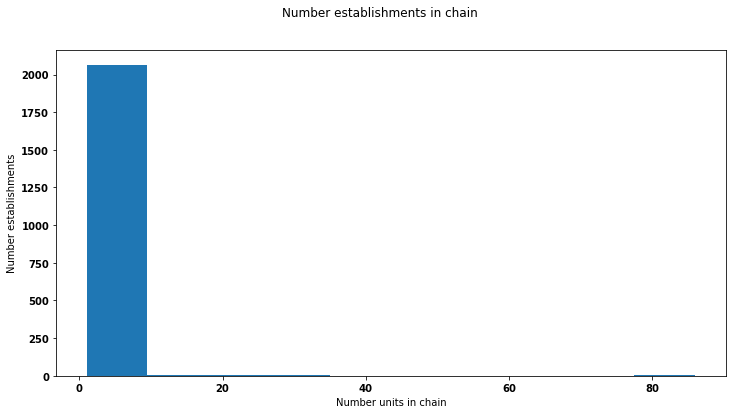

In [111]:
fig, ax = plt.subplots(figsize = (12,6))
counting_mama_chains.id.plot(kind = "hist")

fig.suptitle("Number establishments in chain")
ax.set_xlabel("Number units in chain")
ax.set_ylabel("Number establishments")

In order to make our results more visible we can use log scale:

Text(0, 0.5, 'Number establishments')

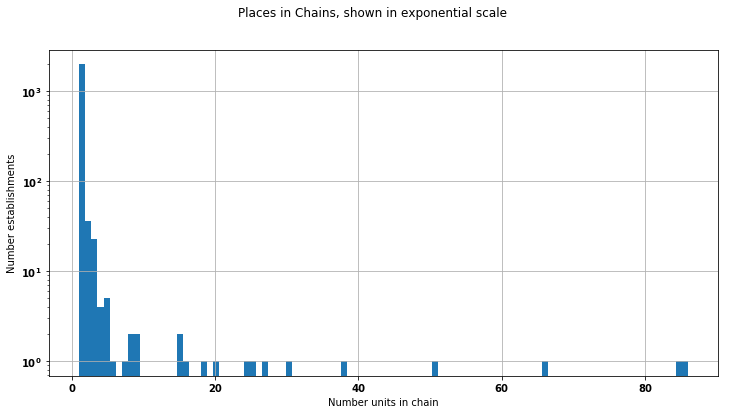

In [135]:

series = pd.Series(counting_mama_chains.id)
fig, ax = plt.subplots(figsize = (12,6))
fig.suptitle("Places in Chains, shown in exponential scale")
series.hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.set_xlabel("Number units in chain")
ax.set_ylabel("Number establishments")

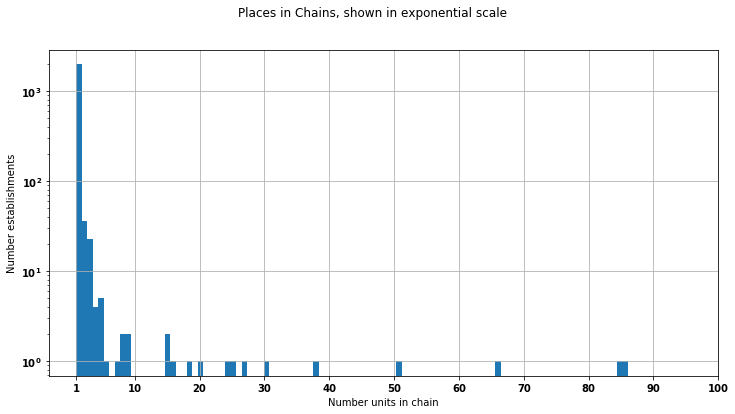

In [336]:
step= range(1,100) 
series = pd.Series(counting_mama_chains.id)
fig, ax = plt.subplots(figsize = (12,6))
fig.suptitle("Places in Chains, shown in exponential scale")
series.hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.set_xlabel("Number units in chain")
ax.set_ylabel("Number establishments")
ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100], minor=False)
   

We can also think in terms of looking at a distribution:

Text(0, 0.5, 'Frequency')

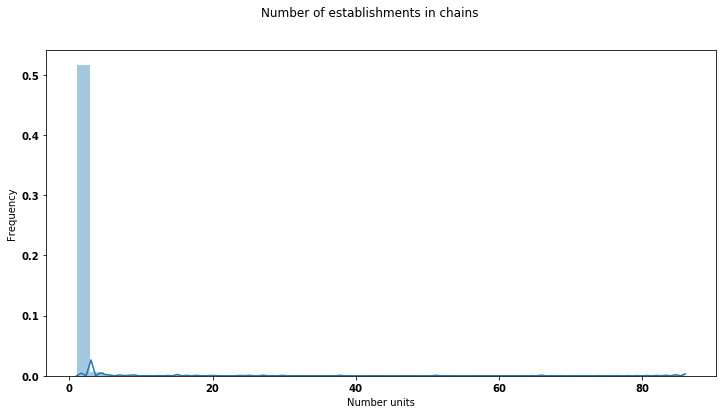

In [136]:

fig, ax = plt.subplots(figsize = (12,6))
fig.suptitle("Number of establishments in chains")
sns.distplot(counting_mama_chains.id) 
#ax.set_yscale('log')
ax.set_xlabel("Number units")
ax.set_ylabel("Frequency")
#ax.set_xtics(1,100, =False)

Now we can look at the data on seats:

Text(0, 0.5, 'Number establishments')

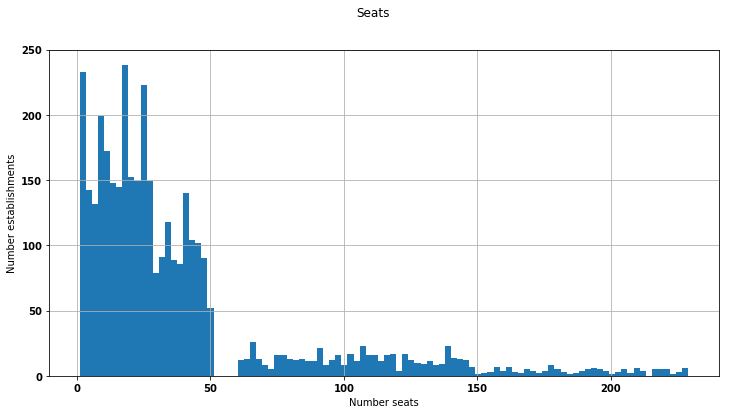

In [114]:
series = pd.Series(data_on_chains['number'])
fig, ax = plt.subplots(figsize = (12,6))
fig.suptitle("Seats")
series.hist(ax=ax, bins=100)
#ax.set_yscale('log')
ax.set_xlabel("Number seats")
ax.set_ylabel("Number establishments")

We can lookat the same data in terms of how often restraunts of a certain number of seats occur in chains instead of thinking of raw numbers:

Text(0, 0.5, 'Frequency')

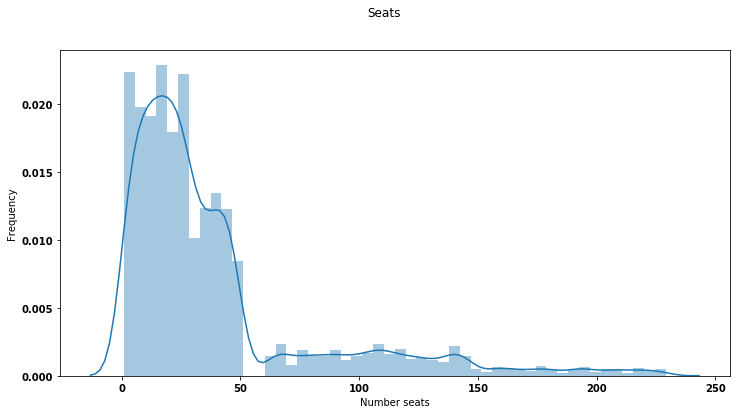

In [117]:
#series = pd.Series(data_on_chains['number'])
fig, ax = plt.subplots(figsize = (12,6))
fig.suptitle("Seats")
sns.distplot(data_on_chains['number']) 
#ax.set_yscale('log')
ax.set_xlabel("Number seats")
ax.set_ylabel("Frequency")

In [31]:
alt_data = data_on_chains 

alt_data['mama_chain'] = (data_on_chains ['object_name']
                            .replace('(^[0-9]+)','',regex=True)
                            .replace('[0-9 #]+$','',regex=True))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [32]:
alt_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 8 to 9650
Data columns (total 7 columns):
id             3676 non-null int64
object_name    3676 non-null object
address        3676 non-null object
chain          3676 non-null object
object_type    3676 non-null object
number         3676 non-null int64
mama_chain     3676 non-null object
dtypes: int64(2), object(5)
memory usage: 229.8+ KB


In [33]:
alt_data.id = str(alt_data.id)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [34]:
alt_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 8 to 9650
Data columns (total 7 columns):
id             3676 non-null object
object_name    3676 non-null object
address        3676 non-null object
chain          3676 non-null object
object_type    3676 non-null object
number         3676 non-null int64
mama_chain     3676 non-null object
dtypes: int64(1), object(6)
memory usage: 229.8+ KB


In [35]:
mama_chain_sum = alt_data.groupby('mama_chain').count()
mama_chain_sum = mama_chain_sum.sort_values(by = 'id', ascending = False)
print(mama_chain_sum.head(20))

                             id  object_name  address  chain  object_type  \
mama_chain                                                                  
SUBWAY                      118          118      118    118          118   
STARBUCKS COFFEE             87           87       87     87           87   
MCDONALD'S                   79           79       79     79           79   
JACK IN THE BOX              52           52       52     52           52   
THE COFFEE BEAN & TEA LEAF   51           51       51     51           51   
BURGER KING                  38           38       38     38           38   
EL POLLO LOCO                36           36       36     36           36   
STARBUCKS                    31           31       31     31           31   
DOMINO'S PIZZA               30           30       30     30           30   
TACO BELL                    30           30       30     30           30   
PIZZA HUT                    30           30       30     30           30   

In [144]:
# make a column where count of mamachain for that name shows up

#make a dictioinary of mama chain and count for mama chain
mama_chain_sum = alt_data.groupby('mama_chain').count().rename(columns={'id':'restaurants_in_chain'})
merged = alt_data.merge(mama_chain_sum, on='mama_chain')

merged = merged.drop(['object_name_y','address_y','chain_y', 'object_type_y', 'number_y', 'street_y'], axis =1)
merged = merged.rename(columns={'number_x':'number_seats'})
print(merged.head(10))

                                                  id         object_name_x  \
0  8       8       11794\n10      11796\n11      ...            ABC DONUTS   
1  8       8       11794\n10      11796\n11      ...            ABC DONUTS   
2  8       8       11794\n10      11796\n11      ...         EL POLLO LOCO   
3  8       8       11794\n10      11796\n11      ...   EL POLLO LOCO #5322   
4  8       8       11794\n10      11796\n11      ...   EL POLLO LOCO #3531   
5  8       8       11794\n10      11796\n11      ...  EL POLLO LOCO # 5386   
6  8       8       11794\n10      11796\n11      ...         EL POLLO LOCO   
7  8       8       11794\n10      11796\n11      ...         EL POLLO LOCO   
8  8       8       11794\n10      11796\n11      ...         EL POLLO LOCO   
9  8       8       11794\n10      11796\n11      ...   EL POLLO LOCO #5906   

                         address_x chain_x object_type_x  number_seats  \
0  3027 N SAN FERNANDO RD UNIT 103    True     Fast Food           

In [145]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3675
Data columns (total 9 columns):
id                      3676 non-null object
object_name_x           3676 non-null object
address_x               3676 non-null object
chain_x                 3676 non-null object
object_type_x           3676 non-null object
number_seats            3676 non-null int64
mama_chain              3676 non-null object
street_x                3676 non-null object
restaurants_in_chain    3676 non-null int64
dtypes: int64(2), object(7)
memory usage: 287.2+ KB


In [146]:
merged_reduced= merged.drop(['id','object_name_x','address_x','chain_x', 'object_type_x'], axis =1)

In [147]:
merged_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3675
Data columns (total 4 columns):
number_seats            3676 non-null int64
mama_chain              3676 non-null object
street_x                3676 non-null object
restaurants_in_chain    3676 non-null int64
dtypes: int64(2), object(2)
memory usage: 143.6+ KB


Text(0.5, 1.08, 'Number seats, number establishments in chain')

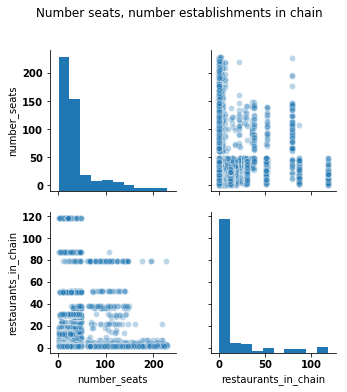

In [156]:


g = sns.pairplot(merged_reduced, plot_kws={'alpha':0.3})
g.fig.suptitle("Number seats, number establishments in chain",  y=1.08)


We can think about trying a regression to see if there is a relationship between number of places on street and number of seats:

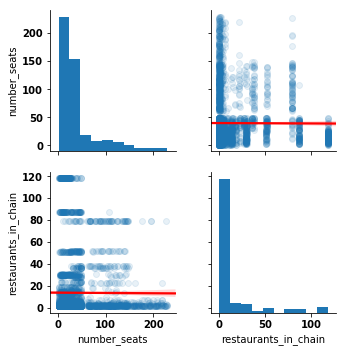

In [208]:
go_regress = sns.pairplot(merged_reduced, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Turns out the relationship does not seem to be there- our line regresses like a zero. Nonethelss we can also look at a jointplot just to be complete:

Text(0.5, 0.98, 'Seats and Units')

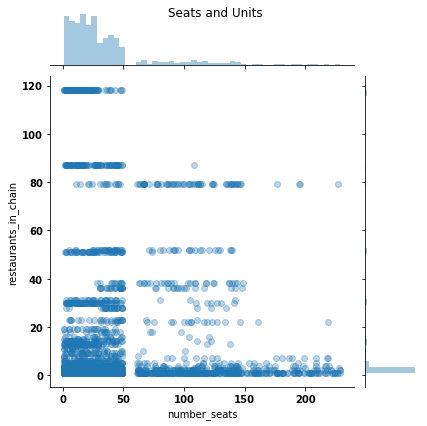

In [210]:


ax =sns.jointplot(x="number_seats", y="restaurants_in_chain", data=merged_reduced, alpha =0.3) 
#ax.set(xlabel="Number seats", ylabel = "Number restaurants in chain")
#ax.set_title('Seats and Units')
ax.fig.suptitle("Seats and Units")

So when we look at a joined plot we can see that most chains are both below 50 units, and seat fewer than 100 people. We can also see there are places with more seating. 

We can also look at the average seat number in these places:

In [262]:
data_by_type= data_on_chains.groupby('object_type').mean()
print(data_by_type)


                number
object_type           
Bakery       21.773852
Bar          40.259740
Cafe         25.917293
Fast Food    38.089256
Pizza        25.529412
Restaurant   44.856021


We see bars, fast food places and restaurants seat far more people than bareies or pizza joints. This is exactly in line with what one would expect given food and dining culture in the USA. But did we have a big enough sample? We can check the count of each type:

In [158]:
data_by_type= data_on_chains.groupby('object_type')


typedataframe= pd.DataFrame({'count' :data_on_chains.groupby('object_type').size()}).reset_index()
print(typedataframe.head(10))

  object_type  count
0      Bakery    283
1         Bar     77
2        Cafe    266
3   Fast Food    605
4       Pizza    153
5  Restaurant   2292


We can also break down seat numbers by establishment type further than just looking at means:

In [337]:
bakeries= data_on_chains[data_on_chains.object_type== "Bakery"]
cafes= data_on_chains[data_on_chains.object_type== "Cafe"]
bars= data_on_chains[data_on_chains.object_type== "Bar"]
fasto= data_on_chains[data_on_chains.object_type== "Fast Food"]
pizza= data_on_chains[data_on_chains.object_type== "Pizza"]
rest= data_on_chains[data_on_chains.object_type== "Restaurant"]

In [338]:
fig = px.histogram(bakeries, x= 'number',
             title='Number of seats in bakeries',
                   labels={'number':'number seats'}, # can specify one label per df column
                   opacity=0.8,
            color_discrete_sequence=['indianred'] # color of histogram bars
            )
fig.update_xaxes(tickangle=45)
fig.show()

In [339]:
fig = px.histogram(cafes, x= 'number',
             title='Number of seats in cafes',
                   labels={'number':'number seats'}, # can specify one label per df column
                   opacity=0.8,
            )
fig.update_xaxes(tickangle=45)
fig.show()

In [251]:
fig = px.histogram(bars, x= 'number',
             title='Total number of seats in bars',
                   labels={'number':'number seats'}, # can specify one label per df column
                   opacity=0.8,
            color_discrete_sequence=['green'] # color of histogram bars
            )
fig.update_xaxes(tickangle=45)
fig.show()

In [260]:
fig = px.histogram(fasto, x= 'number',
             title='Number of seats in fast food places',
                   labels={'number':'number seats'}, # can specify one label per df column
                   opacity=0.8,
            color_discrete_sequence=['purple'] # color of histogram bars
            )
fig.update_xaxes(tickangle=45)
fig.show()

In [249]:
fig = px.histogram(pizza, x= 'number',
             title='Number of seats in pizza joints',
                   labels={'number':'number seats'}, # can specify one label per df column
                   opacity=0.8,
            color_discrete_sequence=['yellow'] # color of histogram bars
            )
fig.update_xaxes(tickangle=45)
fig.show()

In [254]:
fig = px.histogram(rest, x= 'number', 
             title='Number of seats in restaurants',
                   labels={'number':'number seats'}, # can specify one label per df column
                   opacity=0.8,
            color_discrete_sequence=['indigo'] # color of histogram bars
            )
fig.update_xaxes(tickangle=45)
fig.show()

We can look at a big picture of where all the seats are, with type of chain seperated, and each establishment as a line(interactive):

In [172]:

data = data_on_chains
fig = px.bar(data, x='number', y='object_type', color="object_type",
             title='Total number of seats by type of establishment in chains',
            labels={ # replaces default labels by column name
                "number": "Number Seats",  "object_type": "Type of establishment"
            })
fig.update_xaxes(tickangle=45)
#fig.set_xlabel("Number seats")
fig.show()




<a id='the_destination2.5'></a>
## Geography: data on location organized


In order to think about location we can divide the establishments be what street they are on. Street number is not neccesarily of interest. Therefore we can "mung" it off and create a new column in our dataset of simply the street.

In [46]:
munged = data
munged['street'] = (data['address']
                            .replace('(^[0-9]+)','',regex=True)
                            .replace('[0-9 #]+$','',regex=True)
                            .replace('[1/2]','',regex=True)
                            .replace('#','',regex=True)
                            .replace('[0-9][aA-zZ]','',regex=True))
   

In [47]:
def printmd(string):
    display(Markdown(string))
    
printmd('**Street Munged Data**')
munged.head(15).style.set_properties(**{'background-color': 'pink',                                                   
                                    'color': 'blue',                       
                                    'border-color': 'white'})

**Street Munged Data**

,id,object_name,address,chain,object_type,number,mama_chain,street
8,"8 11794 10 11796 11 11797 12 11798 14 11800 15 11801 24 11810 27 11813 29 11815 31 11817 33 11819 34 11820 35 11821 36 11822 37 11823 40 11826 41 11827 42 11828 44 11830 46 11832 48 11834 50 11836 58 11844 61 11847 65 11851 66 11852 67 11853 68 11854 71 11857 73 11859 ... 9552 21338 9560 21346 9563 21349 9564 21350 9572 21358 9573 21359 9575 21361 9576 21362 9577 21363 9578 21364 9581 21367 9584 21370 9585 21371 9586 21372 9590 21376 9591 21377 9593 21379 9595 21381 9597 21383 9601 21387 9605 21391 9608 21394 9618 21404 9621 21407 9627 21413 9629 21415 9636 21422 9639 21425 9648 21434 9650 21436 Name: id, Length: 3676, dtype: int64",ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,ABC DONUTS,N SAN FERNANDO RD UNIT
10,"8 11794 10 11796 11 11797 12 11798 14 11800 15 11801 24 11810 27 11813 29 11815 31 11817 33 11819 34 11820 35 11821 36 11822 37 11823 40 11826 41 11827 42 11828 44 11830 46 11832 48 11834 50 11836 58 11844 61 11847 65 11851 66 11852 67 11853 68 11854 71 11857 73 11859 ... 9552 21338 9560 21346 9563 21349 9564 21350 9572 21358 9573 21359 9575 21361 9576 21362 9577 21363 9578 21364 9581 21367 9584 21370 9585 21371 9586 21372 9590 21376 9591 21377 9593 21379 9595 21381 9597 21383 9601 21387 9605 21391 9608 21394 9618 21404 9621 21407 9627 21413 9629 21415 9636 21422 9639 21425 9648 21434 9650 21436 Name: id, Length: 3676, dtype: int64",EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,EL POLLO LOCO,W SUNSET BLVD
11,"8 11794 10 11796 11 11797 12 11798 14 11800 15 11801 24 11810 27 11813 29 11815 31 11817 33 11819 34 11820 35 11821 36 11822 37 11823 40 11826 41 11827 42 11828 44 11830 46 11832 48 11834 50 11836 58 11844 61 11847 65 11851 66 11852 67 11853 68 11854 71 11857 73 11859 ... 9552 21338 9560 21346 9563 21349 9564 21350 9572 21358 9573 21359 9575 21361 9576 21362 9577 21363 9578 21364 9581 21367 9584 21370 9585 21371 9586 21372 9590 21376 9591 21377 9593 21379 9595 21381 9597 21383 9601 21387 9605 21391 9608 21394 9618 21404 9621 21407 9627 21413 9629 21415 9636 21422 9639 21425 9648 21434 9650 21436 Name: id, Length: 3676, dtype: int64",POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17,POONG NYUN BAKERY,S WESTERN AVE STE
12,"8 11794 10 11796 11 11797 12 11798 14 11800 15 11801 24 11810 27 11813 29 11815 31 11817 33 11819 34 11820 35 11821 36 11822 37 11823 40 11826 41 11827 42 11828 44 11830 46 11832 48 11834 50 11836 58 11844 61 11847 65 11851 66 11852 67 11853 68 11854 71 11857 73 11859 ... 9552 21338 9560 21346 9563 21349 9564 21350 9572 21358 9573 21359 9575 21361 9576 21362 9577 21363 9578 21364 9581 21367 9584 21370 9585 21371 9586 21372 9590 21376 9591 21377 9593 21379 9595 21381 9597 21383 9601 21387 9605 21391 9608 21394 9618 21404 9621 21407 9627 21413 9629 21415 9636 21422 9639 21425 9648 21434 9650 21436 Name: id, Length: 3676, dtype: int64",EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133,EMC RESTAURANT GROUP LLC,W H ST STE
14,"8 11794 10 11796 11 11797 12 11798 14 11800 15 11801 24 11810 27 11813 29 11815 31 11817 33 11819 34 11820 35 11821 36 11822 37 11823 40 11826 41 11827 42 11828 44 11830 46 11832 48 11834 50 11836 58 11844 61 11847 65 11851 66 11852 67 11853 68 11854 71 11857 73 11859 ... 9552 21338 9560 21346 9563 21349 9564 21350 9572 21358 9573 21359 9575 21361 9576 21362 9577 21363 9578 21364 9581 21367 9584 21370 9585 21371 9586 21372 9590 21376 9591 21377 9593 21379 9595 21381 9597 21383 9601 21387 9605 21391 9608 21394 9618 21404 9621 21407 9627 21413 9629 21415 9636 21422 9639 21425 9648 21434 9650 21436 Name: id, Length: 3676, dtype: int64",CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,CUSCATLECA BAKERY,W SUNSET BLVD A
15,"8 11794 10 11796 11 11797 12 11798 14 11800 15 11801 24 11810 27 11813 29 11815 31 11817 33 11819 34 11820 35 11821 36 11822 37 11823 40 11826 41 11827 42 11828 44 11830 46 11832 48 11834 50 11836 58 11844 61 11847 65 11851 66 11852 67 11853 68

Now we can ask what are the top streets to have eating establishments:

In [48]:
top_streets= munged.groupby('street').count()

In [49]:
top_streets= top_streets.sort_values(by ='id', ascending=False)

In [50]:
print(top_streets.head(10))

                     id  object_name  address  chain  object_type  number  \
street                                                                      
 W H ST             116          116      116    116          116     116   
 W SUNSET BLVD      108          108      108    108          108     108   
 W PICO BLVD         93           93       93     93           93      93   
 WILSHIRE BLVD       77           77       77     77           77      77   
 SANTA MONICA BLVD   76           76       76     76           76      76   
 S FIGUEROA ST       74           74       74     74           74      74   
 S WESTERN AVE       70           70       70     70           70      70   
 S VERMONT AVE       67           67       67     67           67      67   
 HOLLYWOOD BLVD      60           60       60     60           60      60   
 W D ST              57           57       57     57           57      57   

                    mama_chain  
street                          
 W H ST  

In [51]:
tip_top_streets= (top_streets.head(10))
tip_top_streets= tip_top_streets.reset_index()
print()

In [52]:
print(tip_top_streets)

               street   id  object_name  address  chain  object_type  number  \
0              W H ST  116          116      116    116          116     116   
1       W SUNSET BLVD  108          108      108    108          108     108   
2         W PICO BLVD   93           93       93     93           93      93   
3       WILSHIRE BLVD   77           77       77     77           77      77   
4   SANTA MONICA BLVD   76           76       76     76           76      76   
5       S FIGUEROA ST   74           74       74     74           74      74   
6       S WESTERN AVE   70           70       70     70           70      70   
7       S VERMONT AVE   67           67       67     67           67      67   
8      HOLLYWOOD BLVD   60           60       60     60           60      60   
9              W D ST   57           57       57     57           57      57   

   mama_chain  
0         116  
1         108  
2          93  
3          77  
4          76  
5          74  
6      

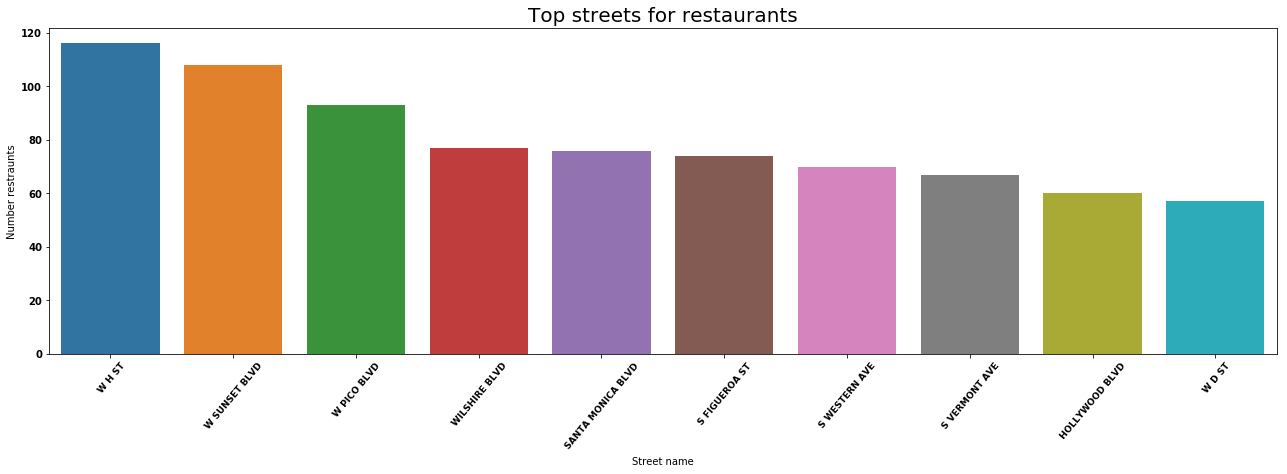

In [342]:
#fig, test = plt.subplots()

plt.figure(figsize = (22,6))

ax = sns.barplot(x="street", y="id", data=tip_top_streets) 
ax.set(xlabel="Street name", ylabel = "Number restraunts")
ax.set_title('Top streets for restaurants', fontsize=20)
plt.gca().xaxis.set_tick_params(rotation = 50, labelsize=9)
#plt.legend()

#plt.set_title('Top Streets for Dining')
#plt.set_ylabel('Number')


#plt.title(" Top Streets for Dining", fontsize=20)
#plt.xlabel("Street Name")
#plt.ylabel("NUmber")
plt.show()

We can also ask about the other end of the distribution, finding how many streets with only one restraunt:

In [54]:
low_streets=top_streets[top_streets.id== 1]
print(len(low_streets), "is the number of streets with only one place to dine.")

616 is the number of streets with only one place to dine.


For streets with a lot of restaurants, we can look at the distribution of the number of seats for trends:

In [55]:
munged.id = str(munged.id)

In [56]:
street_sum = munged.groupby('street').count().rename(columns={'id':'street_count'})

In [57]:
street_sum= street_sum.reset_index()
print(street_sum)

                        street  street_count  object_name  address  chain  \
0                COLORADO BLVD             1            1        1      1   
1               E BEVERLY BLVD             1            1        1      1   
2            E EL SEGUNDO BLVD             1            1        1      1   
3                      E ST ST             2            2        2      2   
4              E WHITTIER BLVD             1            1        1      1   
5                HILLHURST AVE             1            1        1      1   
6              LA CIENEGA BLVD             1            1        1      1   
7                   N BROADWAY             2            2        2      2   
8                N LA BREA AVE             1            1        1      1   
9            N LA CIENEGA BLVD             1            1        1      1   
10            N LARCHMONT BLVD             1            1        1      1   
11                 N SPRING ST             1            1        1      1   

In [58]:
print(munged)

                                                     id  \
8     8       8       11794\n10      11796\n11      ...   
10    8       8       11794\n10      11796\n11      ...   
11    8       8       11794\n10      11796\n11      ...   
12    8       8       11794\n10      11796\n11      ...   
14    8       8       11794\n10      11796\n11      ...   
15    8       8       11794\n10      11796\n11      ...   
24    8       8       11794\n10      11796\n11      ...   
27    8       8       11794\n10      11796\n11      ...   
29    8       8       11794\n10      11796\n11      ...   
31    8       8       11794\n10      11796\n11      ...   
33    8       8       11794\n10      11796\n11      ...   
34    8       8       11794\n10      11796\n11      ...   
35    8       8       11794\n10      11796\n11      ...   
36    8       8       11794\n10      11796\n11      ...   
37    8       8       11794\n10      11796\n11      ...   
40    8       8       11794\n10      11796\n11      ... 

In [59]:
merged_streets = munged.merge(street_sum, on='street')
merged_streets = merged_streets.drop(['id','object_name_y','address_y','chain_y', 'object_type_y', 'number_y'], axis =1)
print(merged_streets.head(10))

      object_name_x                        address_x chain_x object_type_x  \
0        ABC DONUTS  3027 N SAN FERNANDO RD UNIT 103    True     Fast Food   
1     EL POLLO LOCO               5319 W SUNSET BLVD    True    Restaurant   
2  DUNES RESTAURANT               5625 W SUNSET BLVD    True    Restaurant   
3  ONO HAWAIIAN BBQ               5539 W SUNSET BLVD    True    Restaurant   
4       MUSH BAKERY               5224 W SUNSET BLVD    True        Bakery   
5        WABA GRILL               7109 W SUNSET BLVD    True    Restaurant   
6              IHOP               7006 W SUNSET BLVD    True    Restaurant   
7     CELAYA BAKERY               1630 W SUNSET BLVD    True        Bakery   
8    ZANKOU CHICKEN               7851 W SUNSET BLVD    True    Restaurant   
9  THE VEGGIE GRILL         8000 W SUNSET BLVD # 112    True    Restaurant   

   number_x      mama_chain_x                   street  street_count  \
0         1        ABC DONUTS   N SAN FERNANDO RD UNIT             1 

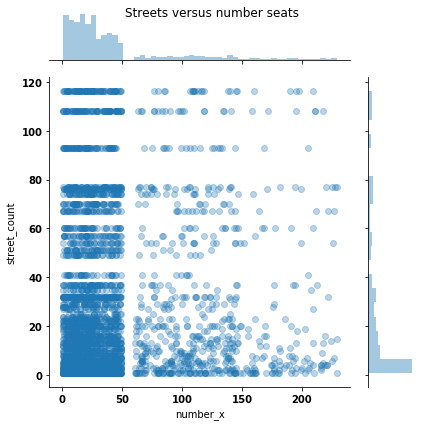

In [88]:
p = sns.jointplot(x="number_x", y="street_count", data=merged_streets) 
p.fig.suptitle("Streets versus number seats")
p.ax_joint.collections[0].set_alpha(0.3)
p.fig.tight_layout()


In [61]:
merged_streets.describe()

,number_x,street_count,mama_chain_y
count,3676.000000,3676.000000,3676.000000
mean,39.694233,29.230141,29.230141
std,43.437212,32.934308,32.934308
min,1.000000,1.000000,1.000000
25%,13.000000,3.000000,3.000000
50%,25.000000,16.000000,16.000000
75%,44.000000,49.000000,49.000000
max,229.000000,116.000000,116.000000


So that gives us some idea of the general trend. But what about the streets with many restraunts. We can look at our top ten street. Picking the top ten seems arbitrary. We can look at a histogram to see the distribution.

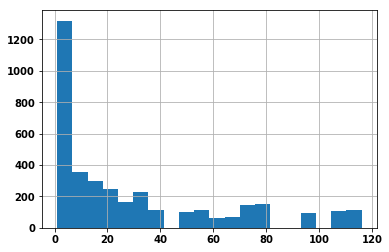

In [67]:
merged_streets_top_streets= merged_streets.sort_values(by= 'street_count', ascending=False)
merged_streets_top_streets ['street_count'].hist( bins = 20)

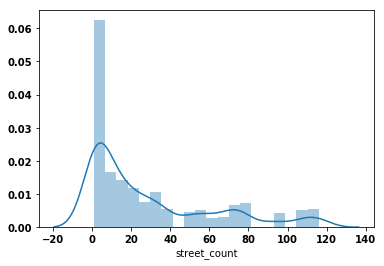

In [179]:


ax1=sns.distplot(merged_streets_top_streets ['street_count']) 


According to our statistics 75% of streets have fewer than 50 places to eat. We could look at the top quartile of the data but tt looks like the truly packed streets are those with over 90 establishments, so we could filter for that instead. In the end where we make the cut is a bit arbitrary. So that we have more data we can look at the entire top quartile, which would be places with at least than 49 establishments on the street according to our statistics. 

In [188]:
big_streets= merged_streets[merged_streets['street_count']>=49]

In [189]:
big_streets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 1 to 2159
Data columns (total 9 columns):
object_name_x    952 non-null object
address_x        952 non-null object
chain_x          952 non-null object
object_type_x    952 non-null object
number_x         952 non-null int64
mama_chain_x     952 non-null object
street           952 non-null object
street_count     952 non-null int64
mama_chain_y     952 non-null int64
dtypes: int64(3), object(6)
memory usage: 74.4+ KB


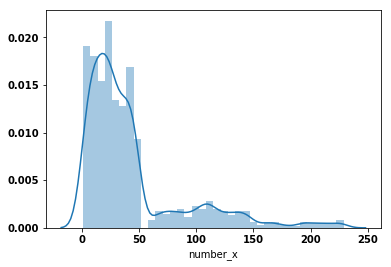

In [286]:
ax1=sns.distplot(big_streets['number_x']) 
plt.savefig('12345.png')

So if we look at the distribution of seats in places on streets with lots of places to eat the distribution is not very different than it is for all places to eat. Most places have under 50 seats, but a few have more. 

<a id='the_destination3'></a>
## Step 3: Presentations

### A presentation for investors



Presentation: <link to cloud storage> 

